In [2]:
import cv2
from matplotlib import figure, pyplot
import json
classes=( 'penis', 'vagina','breast', 'butt','naked-body', 'naked-bottom', 'underwear','bra','hand','dildo','cum','tongue')
classesList={'penis':1, 'vagina':2,'breast':3, 'butt':4,'naked-body':5, 'naked-bottom':6, 'underwear':7,'bra':8,'hand':9,'dildo':10,'cum':11,'tongue':12}

In [15]:
# path = '/home/jovyan/fast-data/scrolller/'
# annt1 = json.load(open(path+'/annotations/random_12.json','r'))
# annt2 = json.load(open(path+'/annotations/pornpic_2000.json','r'))
# annt = json.load(open(path+'/annotations/random_12_pornpic_2000.json','r'))
import glob

#path = '/home/shengtao/Data/censor_dat/'
path = '/home/jovyan/fast-data/censor/'


annt1_path = path+'/annotations_add/random1.json'
annt2_path = path+'/annotations_add/random2.json'
annt3_path = path+'/annotations_add/pornpic2k.json'
annt4_path = path+'/annotations_add/hm_train3k.json'
annt5_path = path+'/annotations_add/abby_javporn.json'
annt6_path = path+'/annotations_add/fc2photo.json'
annt7_path = path+'/annotations_add/fc2video.json'

annt1 = json.load(open(annt1_path,'r')) #json.load(open(path+'/annotations_add/random1.json','r'))
annt2 = json.load(open(annt2_path,'r')) #json.load(open(path+'/annotations_add/random2.json','r'))
annt3 = json.load(open(annt3_path,'r')) #json.load(open(path+'/annotations_add/pornpic2k.json','r'))
annt4 = json.load(open(annt4_path,'r')) #json.load(open(path+'/annotations_add/hm_train3k.json','r'))
annt5 = json.load(open(annt5_path,'r')) #json.load(open(path+'/annotations_add/abby_javporn.json','r'))
annt6 = json.load(open(annt6_path,'r'))
annt7 = json.load(open(annt7_path,'r'))

print(len(annt1['images']))
print(len(annt2['images']))
print(len(annt3['images']))
print(len(annt4['images']))
print(len(annt5['images']))
print(len(annt6['images']))
print(len(annt7['images']))

annt_val = json.load(open(path+'/annotations_add/val.json','r'))
bk_val_list = glob.glob('/home/shengtao/Data/coco_censor/bk_val_coco/*.jpg')
bk_train_list = glob.glob('/home/shengtao/Data/coco_censor/bk_train_coco/*.jpg')
#annt = json.load(open(path+'/annotations_add/random12_pornpic2k_hm3k_abby_javporn.json','r'))
#annt = json.load(open(path+'/annotations_add/abby_javporn.json','r'))

447
423
2000
2996
903
1132
2706


In [16]:
from tqdm import tqdm
from PIL import Image
sel_classes={ 'penis':1, 'vagina':2,'breast':3, 'butt':4,'naked-body':5, 'naked-bottom':6, 'underwear':7,'bra':8,'dildo':9,'cum':10}
new_classes=( 'penis', 'vagina','breast', 'butt','naked-body', 'naked-bottom', 'underwear','bra','dildo','cum')

def get_catKeys(annt1):
    annt1_key={}
    for cat in annt1['categories']:
        annt1_key[cat['name']] = cat['id']  
    return annt1_key

def filter_categories(sel_classes,annt2):
    count = 1 
    newcmb = {}
    newcmb['info'] = annt2['info']
    newcmb['licenses']=annt2['licenses']
    newcmb['images']=annt2['images']
    
    newcmb['annotations']=[]
    prevCat = annt2['categories']
    newcmb['categories']=[]
    for a in sel_classes.keys():
        tmp = {'id':0, 'supercategory':'', 'name':''}
        tmp['id'] = sel_classes[a]
        tmp['name'] = a
        newcmb['categories'].append(tmp)
    #print(newcmb['categories'])
    #print(len(newcmb['annotations']))
    for an in tqdm(annt2['annotations']):
        cat = prevCat[an['category_id']-1]['name']
        newBBID = count 
        if cat not in sel_classes.keys():
            continue
        else:
            newCatId = sel_classes[cat]
            an['category_id'] = newCatId
            an['id'] = newBBID
            newcmb['annotations'].append(an)
            count = count+1  
    return newcmb

def get_image_info(fileName):
    dat = {'height': -1,
         'file_name': '',
         'date_captured': 0,
         'id': -1,
         'coco_url': '',
         'license': 0,
         'width': -1,
         'flickr_url': ''}
    dat['file_name'] = fileName.split('/')[-1]
    img = Image.open(fileName)
    dat['height'] = img.height
    dat['width'] = img.width
    return dat

def get_new_annt(cat=999,image_id='file',aid=-1,area=0,bbox=[]):
    x={'attributes': {'occluded': False}, 
       'category_id': cat, 
       'iscrowd': 0, 
       'image_id': image_id, 
       'segmentation': [],
       'id': aid, 
       'area': area, 
       'bbox': bbox}
    return x

def get_new_image(height=-1, width=-1,file='',fidx=-1,):
    dat = {'height': height,
         'file_name': file,
         'date_captured': 0,
         'id': fidx,
         'coco_url': '',
         'license': 0,
         'width': width,
         'flickr_url': ''}
    return dat    
def get_empty_coco():
    dat={'info': {'url': '', 'year': '', 'contributor': '', 'description': '', 'version': '', 'date_created': ''},
        'annotations':[],
        'categories':[],
        'images':[],
         'licenses':[{'id': 0, 'url': '', 'name': ''}]
        }
    return dat
def add_background(annt1, add_imageList):
    #"not implemented yet"
    #"design to add background to the training samples"
    annt_combine = get_empty_coco()
    annt_combine['categories'] = annt1['categories']
    annt_combine['annotations'] = annt1['annotations'].copy()
    annt_combine['images'] = annt1['images'].copy()
    image_ann1_len = len(annt1['images'])
    last_image_ann1_id = annt1['images'][image_ann1_len-1]['id']
    for idx,imageFile in enumerate(add_imageList):
        imgDat = get_image_info(imageFile)
        newImageID = idx+1+ last_image_ann1_id
        imgDat['id'] = newImageID
        annt_combine['images'].append(imgDat)
    return annt_combine

def concat_two_dat(annt1, annt2, CatKey1=None, CatKey2=None):
    ## append annt2 into annt1 and following annt1 categories id info
    image_ann1_len = len(annt1['images'])
    last_image_ann1_id = annt1['images'][image_ann1_len-1]['id']
    bb_ann1_len = len(annt1['annotations'])
    last_bb_ann1_id = annt1['annotations'][bb_ann1_len-1]['id']
    annt_combine = annt1
    for image in annt2['images']:
        newImageID = image['id']+ last_image_ann1_id
        image['id'] =newImageID
        annt_combine['images'].append(image)
    count = 1 
    for an in annt2['annotations']:
        newImageID = an['image_id']+ last_image_ann1_id
        an['image_id'] =newImageID   
        if annt2['categories'] != annt1['categories']:
            assert CatKey1 is not None and CatKey2 is not None, 'CatKeys should not be None'
            cat = annt2['categories'][an['category_id']-1]['name']
            newCatId = CatKey1[cat]
            an['category_id'] = newCatId
        newBBID = an['id'] + last_bb_ann1_id
        #newBBID = count + last_bb_ann1_id
        an['id'] = newBBID
        annt_combine['annotations'].append(an)
        count = count+1
    return annt_combine
    
        

rand12 = concat_two_dat(annt1, annt2)
rand12_pornpic2k = concat_two_dat(rand12, annt3)
annt1_key = get_catKeys(annt1)
annt4_key = get_catKeys(annt4)
#print(annt1_key,annt4_key)
rand12_pornpic2k_hm3k = concat_two_dat(rand12_pornpic2k, annt4, annt1_key, annt4_key)
random12_pornpic2k_hm3k_abby_javporn = concat_two_dat(rand12_pornpic2k_hm3k, annt5)
random12_pornpic2k_hm3k_abby_javporn_fc2photo = concat_two_dat(random12_pornpic2k_hm3k_abby_javporn, annt6)
random12_pornpic2k_hm3k_abby_javporn_fc2pv = concat_two_dat(random12_pornpic2k_hm3k_abby_javporn_fc2photo, annt7)


print(len(random12_pornpic2k_hm3k_abby_javporn_fc2pv['images']))
random12_pornpic2k_hm3k_abby_javporn_fc2pv_filt = filter_categories(sel_classes,random12_pornpic2k_hm3k_abby_javporn_fc2pv)
annt_val_flt = filter_categories(sel_classes,annt_val)

annt_val_flt_bgrd = add_background(annt_val_flt,bk_val_list[:200])
random12_pornpic2k_hm3k_abby_javporn_fc2v_filt_bgrd = add_background(random12_pornpic2k_hm3k_abby_javporn_fc2pv_filt,bk_train_list[:10000])
print(len(random12_pornpic2k_hm3k_abby_javporn_fc2pv['images']))

100%|██████████| 549/549 [00:00<00:00, 240915.77it/s]

10607
10607


In [17]:
#### merge random_v1 and random_v2
# fid = open(path+'/annotations/random_12.json','w')
# json.dump(annt_combine,fid,indent=4)
# fid.close()

# fid = open(path+'/annotations/random_12_pornpic_2000.json','w')
# json.dump(annt_combine,fid,indent=4)
# fid.close()

# fid = open(path+'/annotations_add/random12_pornpic2k_hm3k.json','w')
# json.dump(rand12_pornpic2k_hm3k,fid,indent=4)
# fid.close()
# fid = open(path+'/annotations_add/random12_pornpic2k_hm3k_abby_javporn.json','w')
# json.dump(random12_pornpic2k_hm3k_abby_javporn,fid,indent=4)
# fid.close()
fid = open(path+'/annotations_add/random12_pornpic2k_hm3k_abby_javporn_fc2pv.json','w')
json.dump(random12_pornpic2k_hm3k_abby_javporn_fc2pv,fid,indent=4)
fid.close()
# fid = open(path+'/annotations_add/random12_pornpic2k_hm3k_abby_javporn_flt.json','w')
# json.dump(random12_pornpic2k_hm3k_abby_javporn_filt,fid,indent=4)
# fid.close()

# fid = open(path+'/annotations_add/random12_pornpic2k_hm3k_abby_javporn_flt_bgrd.json','w')
# json.dump(random12_pornpic2k_hm3k_abby_javporn_filt_bgrd,fid,indent=4)
# fid.close()

# fid = open(path+'/annotations_add/random12_pornpic2k_hm3k_abby_javporn_fc2photo_flt_bgrd.json','w')
# json.dump(random12_pornpic2k_hm3k_abby_javporn_fc2photo_filt_bgrd,fid,indent=4)
# fid.close()
# fid = open(path+'/annotations_add/val_flt.json','w')
# json.dump(annt_val_flt,fid,indent=4)
# fid.close()

fid = open(path+'/annotations_add/val_flt_bgrd.json','w')
json.dump(annt_val_flt_bgrd,fid,indent=4)
fid.close()

/home/jovyan/fast-data/censor/train/1544153352.03.33.39.jpg


<Figure size 432x288 with 0 Axes>

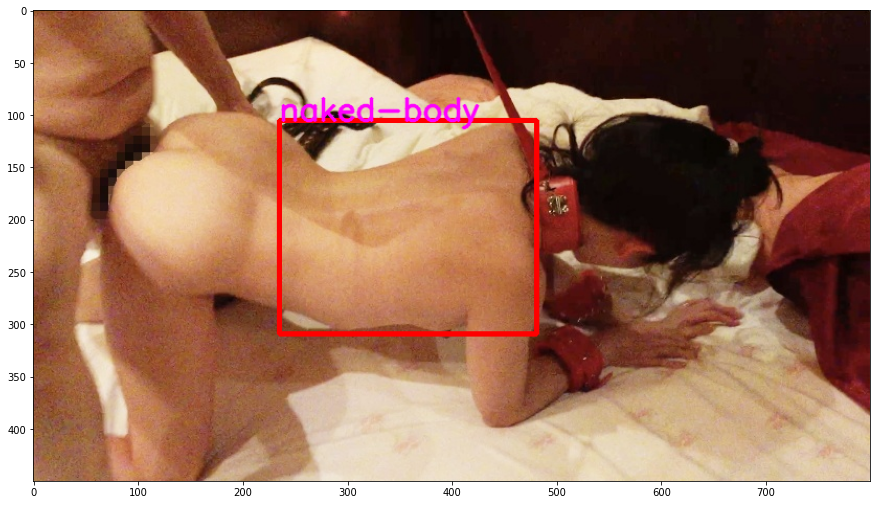

In [28]:
def show_json(jpath='/home/jovyan/fast-data/censor/annotations_add/random12_pornpic2k_hm3k_abby_javporn_fc2pv.json',
             classes=new_classes,
             imgDir = '/home/jovyan/fast-data/censor/train/',
             irange = 21300,
             num_show = 20
             ):
    #annt = json.load(open(path+'/annotations_add/random12_pornpic2k_hm3k_abby_javporn_flt.json','r'))
    annt = json.load(open(jpath,'r'))
    
    #classes = new_classes
    for j in range(num_show):
        i = j+irange
        an = annt['annotations'][i]
        imageID= an['image_id']
        bclass = an['category_id']-1
        imageFile = imgDir+annt['images'][imageID-1]['file_name']
        print(imageFile)
        img = cv2.imread(imageFile)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        bb = an['bbox']
        pt1= (int(bb[0]),int(bb[1]))
        pt2=(int(bb[0]+bb[2]), int(bb[1]+bb[3]))
        imgb=cv2.rectangle(img,pt1,pt2,(255,0,0),3)
        imgb=cv2.putText(imgb,classes[bclass],pt1, cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
        pyplot.figure()
        pyplot.figure(figsize=(15,15)) 
        pyplot.imshow(imgb)
show_json(num_show=1)   

In [57]:
annt4['images'][1]

{'height': 1079,
 'file_name': '18e4d8.jpg',
 'date_captured': 0,
 'id': 2872,
 'coco_url': '',
 'license': 0,
 'width': 772,
 'flickr_url': ''}

In [29]:
import os
import shutil
#trpath = '/home/shengtao/Data/censor_dat/train'
trpath = '/home/jovyan/fast-data/censor/train'
trImgs = glob.glob(trpath+'/*.jpg')
#annt=random12_pornpic2k_hm3k_abby_javporn_filt_bgrd
classes=( 'penis', 'vagina','breast', 'butt','naked-body', 'naked-bottom', 'underwear','bra','hand','dildo','cum','tongue')



def rotate_bbox(imagedat,an):
    imageFile = path+'/train/'+imagedat['file_name']
    bb = an['bbox']
    H = imagedat['height']
    W = imagedat['width']
    nbb = [H-bb[3]-bb[1],bb[0],bb[3],bb[2]]
    return nbb#,img
    
def get_new_rotated_annotations(annt,srcRoot,dstRoot):
    newdat = get_empty_coco()
    images = {} 
    fidx = 1
    aid = 1
    for an in tqdm(annt['annotations']):
        imageID= an['image_id']
        ant_image = annt['images'][imageID-1]
        bclass = an['category_id']-1
        newBB = rotate_bbox(ant_image, an)
        
        imageFile = srcRoot+annt['images'][imageID-1]['file_name']
        newFileName = 'rotated_'+annt['images'][imageID-1]['file_name']

        if newFileName not in images.keys():
            height = ant_image['width']
            width = ant_image['height']
            images[newFileName] = get_new_image(height,width,file=newFileName,fidx=fidx)
            fidx = fidx+1
            newdat['images'].append(images[newFileName])
        
        imgID=images[newFileName]['id']
        newAnnt = get_new_annt(an['category_id'],imgID,aid,newBB[2]*newBB[3],newBB)
        aid = aid+1
        newdat['annotations'].append(newAnnt)
        newFileImagePath = dstRoot + newFileName
        if not os.path.exists(newFileImagePath):
            img = cv2.imread(imageFile)
            imgx = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            cv2.imwrite(newFileImagePath,imgx)
#         if fidx >=10:
#             break
#     for imgKey in images.keys():
#         newdat['images'].append(images[imgKey])
    newdat['categories'] = annt['categories']
#     for im in annt['images']:
#         imageFile = srcRoot+im['file_name']
#         newFileNamePath = dstRoot+ 'rotated_'+im['file_name']
#         if not os.path.exists(newFileNamePath):
#             copypath =  '/home/shengtao/tmp/'+im['file_name']
#             shutil.copyfile(imageFile,copypath)
#             if not os.path.exists(imageFile):
#                print(imageFile+'not found')
    return newdat


# rot_val= get_new_rotated_annotations(annt_val,path+'/val/',path+'/val/')
# rot_val_jpath = path+'/annotations_add/rot_val.json'
# val_jpath = path+'/annotations_add/val.json'
# fid = open(rot_val_jpath,'w')
# json.dump(rot_val,fid,indent=4)
# fid.close()
# show_json(rot_val_jpath,classes,path+'/val/',irange=5)

annt_paths = [annt1_path, annt2_path,annt3_path,annt4_path,annt5_path, annt6_path, annt7_path]

for annt_path in annt_paths:
    annt_dat = json.load(open(annt_path,'r'))
    rot_annt= get_new_rotated_annotations(annt_dat,path+'/train/',path+'/train/')
    rot_annt_path = path+'/annotations_add/rot_'+annt_path.split('/')[-1]
    fid = open(rot_annt_path,'w')
    json.dump(rot_annt,fid,indent=4)
    fid.close()

    
# for annt_path in annt_paths:  
#     rot_annt_path = path+'/annotations_add/rot_'+annt_path.split('/')[-1]
#     #jd = json.load(open(rot_annt_path,'r'))
#     show_json(rot_annt_path,classes,path+'/train/',irange=5,num_show=2)
    

100%|██████████| 7412/7412 [00:18<00:00, 408.21it/s]


In [30]:
jointRot = json.load(open(path+'/annotations_add/'+'random12_pornpic2k_hm3k_abby_javporn_fc2pv.json','r'))#random12_pornpic2k_hm3k_abby_javporn
print(len(jointRot['images']))
for annt_path in annt_paths:
    rot_annt_path = path+'/annotations_add/rot_'+annt_path.split('/')[-1]
    newDat = json.load(open(rot_annt_path,'r'))
    print(len(newDat['images']))
    keyA = get_catKeys(jointRot)
    keyB = get_catKeys(newDat)
    jointRot= concat_two_dat(jointRot, newDat, keyA, keyB)
print(len(jointRot['images']))    
jointRot_flt = filter_categories(sel_classes,jointRot)
jointRot_flt_bgrd = add_background(jointRot_flt,bk_train_list[:10000]) 
print(len(jointRot_flt_bgrd['images']))
jointRot_flt_bgrd_path = path+'/annotations_add/random12_pornpic2k_hm3k_abby_javporn_fc2pv_jointRot_bgrd.json'
fid = open(jointRot_flt_bgrd_path,'w')
json.dump(jointRot_flt_bgrd,fid,indent=4)
fid.close()

annt_val = json.load(open(path+'/annotations_add/val.json','r'))
joint_val_Rot= concat_two_dat(annt_val, rot_val)
annt_val_rot_flt = filter_categories(sel_classes,joint_val_Rot)
annt_val_rot_flt_bgrd = add_background(annt_val_rot_flt,bk_val_list[:200])
annt_val_rot_flt_bgrd_path = path+'/annotations_add/val_jointRot_bgrd.json'
fid = open(annt_val_rot_flt_bgrd_path,'w')
json.dump(annt_val_rot_flt_bgrd,fid,indent=4)
fid.close()

#show_json(jointRot_flt_bgrd_path,new_classes,path+'/train/',irange=24000,num_show=20)

10607
427
414
1857
2262
640
848


100%|██████████| 52630/52630 [00:00<00:00, 338610.93it/s]

2647
19702
19702


NameError: name 'rot_val' is not defined

In [31]:
print(len(jointRot_flt_bgrd['images']))

19702


In [170]:
427+414+1857+2262+640

5600

In [187]:
34807-22062 - 5586

7159